#Import stuff

In [0]:
pip install praw

In [0]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [0]:
reddit = praw.Reddit(client_id='zlYDbigTjgjImg',
                     client_secret='0hW4WTwGwDwU91iCl_19qsXPtYk',
                     user_agent='microsoftwindows_googlecolab:dataexploration:v1.0 (by /u/AB_Awesome)')

In [0]:
print(reddit.read_only)

True


#+ve & -ve test: value_counts, grouping. Past week

In [0]:
submission = reddit.subreddit('soccer').top('week', limit = 2)

In [0]:
submission = reddit.subreddit('soccer').top('week', limit = 10)
flairlist = []
for post in submission: 
    comments = post.comments
    comments.replace_more(limit = 32)
    for comment in comments.list(): 
        #print((comment.body))
        if comment.score >10 or comment.score <-5: 
            flairlist.append([comment.author_flair_text, comment.score])

    

In [0]:
dfflair1 = (pd.DataFrame(flairlist))
dfflair1.columns = ['club', 'score']

In [0]:
dfflair1pos = dfflair1.where(dfflair1.score > 0)

dfflair1pos.club.value_counts()[dfflair1pos.club.value_counts() > 10]

:Liverpool:             207
:Manchester_United:      59
:FC_Barcelona:           52
:Real_Madrid:            50
:Borussia_Dortmund:      27
:Tottenham_Hotspur:      23
:Bayern_Munich:          19
:Chelsea:                17
:Arsenal:                16
:Olympique_Lyonnais:     16
:Sunderland:             13
Name: club, dtype: int64

In [0]:
dfflair1neg = dfflair1.where(dfflair1.score < 0)
dfflair1neg.club.value_counts()[dfflair1neg.club.value_counts() > 10]

:Paris_Saint-Germain:    13
:Liverpool:              12
Name: club, dtype: int64

In [0]:
dfflair1.sort_values('score', ascending=True).head(20)

,club,score
789,None,-207
1169,:Real_Madrid:,-130
817,None,-129
1109,:Real_Madrid:,-127
869,None,-111
936,:Tottenham_Hotspur:,-81
138,:Denmark:,-72
919,:Liverpool:,-62
795,None,-58
924,None,-53


In [0]:
dfflair1pos[dfflair1pos.score > 100].groupby(['club']).sum().sort_values('score', ascending = False).head(20)

,score
club,
:Liverpool:,17556.0
:AC_Milan:,7902.0
:Manchester_United:,6237.0
:Hapoel_Ra_anana:,3371.0
:Chad:,3180.0
:Real_Madrid:,3105.0
:FC_Barcelona:,3093.0
:Borussia_Dortmund:,2706.0
:Bayern_Munich:,2663.0


#Exploring scores distribution. Past month

In [0]:
submission2 = reddit.subreddit('soccer').top('month', limit = 50000)
flairlist2 = []
listofscores = []
for post in submission2: 
    listofscores.append(post.score)
    #if post.score > 1000 and post.score < 6000: 
     #   comments = post.comments
      #  comments.replace_more(limit = 32)
       # for comment in comments.list(): 
        #    #print((comment.body))
         #   if comment.score >10 or comment.score <-5: 
          #      flairlist2.append([post.id, comment.author_flair_text, comment.score])

    

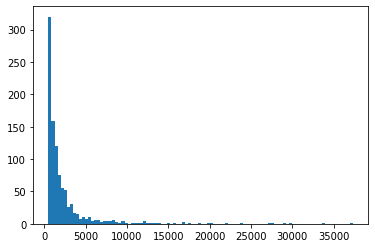

In [0]:
plt.hist(listofscores, bins = 100)
#plt.plot([np.percentile(listofscores, x) for x in range(0, 100)][::-1])
plt.show()

<function matplotlib.pyplot.show>

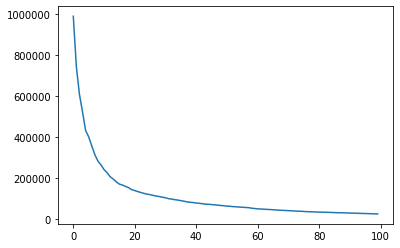

In [0]:
plt.plot([np.percentile(listofscores, x) for x in range(0, 100)][::-1])
plt.show

#+ve and -ve test 2. Past month

In [0]:
submission2 = reddit.subreddit('soccer').top('week', limit = 500)
flairlist2 = []
listofscores = []
for post in submission2: 
    if post.score > 1000 and post.score < 6000: 
        comments = post.comments
        comments.replace_more(limit = 32)
        for comment in comments.list(): 
            #print((comment.body))
            if comment.score >10 or comment.score <-5: 
                flairlist2.append([post.id, comment.author_flair_text, comment.score])

    

In [0]:
dfflair2 = (pd.DataFrame(flairlist2))
dfflair2.columns = ['post', 'club', 'score']

In [0]:
dfflair2pos = dfflair2.where(dfflair2.score > 0)

dfflair2pos.club.value_counts()[dfflair2pos.club.value_counts() > 20]

:Liverpool:                   1208
:Manchester_United:            878
:Arsenal:                      481
:Chelsea:                      415
:Tottenham_Hotspur:            321
:FC_Barcelona:                 265
:Real_Madrid:                  170
:Borussia_Dortmund:            139
:Manchester_City:              133
:Leicester_City_FC:            110
:Everton:                       92
:Newcastle_United:              85
:Bayern_Munich:                 67
:England:                       57
:Ajax:                          46
:Paris_Saint-Germain:           40
:AC_Milan:                      39
:1899_Hoffenheim:               38
                                36
Liverpool                       34
:Internazionale:                34
:Republic_of_Ireland:           31
:Brighton_Hove_Albion:          29
Manchester United               28
:Crystal_Palace_FC:             28
:Wolverhampton_Wanderers_:      28
:Watford_FC:                    28
:Borussia_Monchengladbach:      27
:West_Ham_United:   

#SQL

In [0]:
import sqlite3

In [0]:
conn = sqlite3.connect('AA_db.sqlite')
cur = conn.cursor()
cur.execute('CREATE TABLE redditflairs (postid VARCHAR, postscore INTEGER, commentid VARCHAR, commentscore INTEGER, userflair VARCHAR)')
conn.commit()

conn.close()

#Data mining

In [0]:
submission3 = reddit.subreddit('soccer').top('day', limit = 15)
biglist = []

for post in submission3: 
    comments = post.comments
    comments.replace_more(limit = 32)
    for comment in comments.list():
        if comment.score >10 or comment.score <-5: 
            biglist.append([post.id, post.score, comment.id, comment.score, comment.author_flair_text])

    

In [0]:
dfflairs = pd.DataFrame(biglist)

In [0]:
conn = sqlite3.connect(':memory:')
cur = conn.cursor()

In [0]:
dfflairs.to_sql('flairs', conn, if_exists='replace', index = False)

In [0]:
cur.execute('''
SELECT * FROM flairs;

''')
conn.commit()